# 🧭 A Grand Tour of Python Libraries for Data Science

Welcome!  
This notebook is designed as a **2-hour hands-on exploration** of the **Python data science ecosystem** for MSc students in Economics & Finance.  
It complements the syllabus (Weeks 3–11), giving you a **big picture of the tools** you will use repeatedly.

---

## 📚 The Libraries at a Glance

### 1. **NumPy**
- **What it is:** Core numerical computing library in Python.  
- **What it can do:** Arrays (vectors/matrices), broadcasting, linear algebra, random numbers.  
- **Why it matters:** The foundation for nearly every other scientific library.  
- **Examples in this notebook:**  
  - Array creation & reshaping.  
  - Broadcasting rules.  
  - Linear regression with least squares.  
  - Random simulations (Central Limit Theorem demo).  
  - Efficiency: loops vs vectorization.  

---

### 2. **Pandas**
- **What it is:** Data analysis library built on NumPy.  
- **What it can do:** Tables (`DataFrame`), data cleaning, grouping, joining, time series.  
- **Why it matters:** Economists and finance researchers often work with panel/time series data.  
- **Examples in this notebook:**  
  - DataFrame creation and inspection.  
  - Indexing and selection.  
  - GroupBy and aggregation.  
  - Joins / merges.  
  - Time series with rolling averages.  

---

### 3. **SciPy**
- **What it is:** Scientific computing library that extends NumPy.  
- **What it can do:** Statistics, optimization, integration, ODEs, signal processing.  
- **Why it matters:** Essential for solving econometric estimation, likelihood optimization, or continuous-time models.  
- **Examples in this notebook:**  
  - Probability distributions (Normal PDF/CDF).  
  - Statistical tests (t-test).  
  - Optimization (minimization of functions).  
  - Fast Fourier Transform (FFT) for signals.  
  - Solving ODEs numerically.  

---

### 4. **Matplotlib**
- **What it is:** Base plotting library.  
- **What it can do:** Line plots, scatter plots, histograms, boxplots, bar charts, heatmaps, annotations.  
- **Why it matters:** Visualization is central to data science communication.  
- **Examples in this notebook:**  
  - Annotated sine wave.  
  - Scatter with regression line.  
  - Histogram with overlay.  
  - Subplots.  
  - Heatmaps and contours.  

---

### 5. **SymPy**
- **What it is:** Symbolic math library (like Mathematica, Maple).  
- **What it can do:** Simplify expressions, compute derivatives/integrals, solve equations, series expansions, symbolic ODEs.  
- **Why it matters:** Useful for verifying algebra/calculus when developing models.  
- **Examples in this notebook:**  
  - Simplify rational functions.  
  - Symbolic derivatives and integrals.  
  - Solve polynomial equations.  
  - Series expansions (Taylor).  
  - Symbolic ODE solutions.  

---

### 6. **scikit-learn**
- **What it is:** Machine learning library for classical methods.  
- **What it can do:** Regression, classification, clustering, PCA, pipelines, cross-validation.  
- **Why it matters:** Industry standard for applied ML in economics, finance, and beyond.  
- **Examples in this notebook:**  
  - Linear regression.  
  - Logistic regression classification.  
  - Cross-validation with multiple metrics.  
  - PCA with scree plot.  
  - KMeans clustering.  
  - Random Forest classification.  
  - Pipelines (preprocessing + model).  

---

### 7. **PyTorch**
- **What it is:** Deep learning library from Facebook/Meta.  
- **What it can do:** Tensors, automatic differentiation, flexible neural networks, GPU acceleration.  
- **Why it matters:** Research-oriented, widely used in academia for new methods.  
- **Examples in this notebook:**  
  - Tensors and autograd.  
  - Define a simple MLP.  
  - Train on MNIST subset (digits).  
  - Evaluate accuracy.  
  - Inspect gradients.  

---

### 8. **TensorFlow / Keras**
- **What it is:** Deep learning library from Google; Keras provides a high-level API.  
- **What it can do:** Tensors, model building, training with callbacks, deployment.  
- **Why it matters:** Industry standard for production ML pipelines.  
- **Examples in this notebook:**  
  - Tensor operations.  
  - Sequential model definition.  
  - Model compilation.  
  - Train on MNIST subset.  
  - Evaluate accuracy.  

---

## 🔗 How They Relate

- **NumPy** at the bottom (arrays).  
- **SciPy, Pandas, Matplotlib** extend NumPy.  
- **scikit-learn** builds on NumPy/SciPy/Matplotlib.  
- **PyTorch & TensorFlow** implement their own NumPy-like tensors but add autograd and GPU support.  
- **SymPy** is orthogonal: symbolic (exact) math to complement numeric computing.  

---

## 🎯 Learning Goal

By the end of this notebook you should be able to:
1. Know what each library is *for*.  
2. See at least 5 examples of each in action.  
3. Understand how they fit together into a full data science workflow.  
4. Connect them back to the economics & finance syllabus (Weeks 3–11).  


In [1]:
# ==== Environment setup ====
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy import stats, optimize, integrate
import sympy as sp
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_moons
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

try:
    import torch, torch.nn as nn, torch.optim as optim
    TORCH_OK=True
except:
    TORCH_OK=False
try:
    import tensorflow as tf
    TF_OK=True
except:
    TF_OK=False

np.random.seed(42)
plt.rcParams['figure.figsize']=(7,4.5)
print("TORCH_OK:", TORCH_OK, " TF_OK:", TF_OK)

2025-09-05 21:20:21.200894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757100021.220158   43555 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757100021.226475   43555 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-05 21:20:21.244231: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TORCH_OK: True  TF_OK: True


## 1. NumPy — arrays, broadcasting, linear algebra, random numbers

NumPy is the foundation for most numerical libraries in Python.

a=
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Shape: (3, 4)
a+v=
 [[ 1  3  5  7]
 [ 5  7  9 11]
 [ 9 11 13 15]]
beta: [2.82718715 2.01379327]


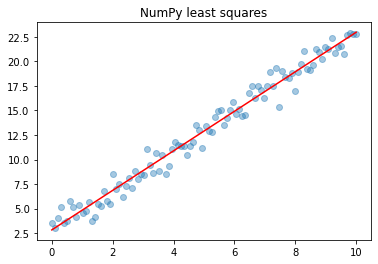

In [2]:
# Array creation and reshaping
a = np.arange(12).reshape(3,4)
print("a=\n",a)
print("Shape:",a.shape)

# Broadcasting demo
v = np.array([1,2,3,4])
print("a+v=\n",a+v)

# Linear algebra: least squares fit y~X
x = np.linspace(0,10,100)
y = 3+2*x+np.random.normal(0,1,100)
X = np.c_[np.ones_like(x),x]
beta,*_ = np.linalg.lstsq(X,y,rcond=None)
print("beta:",beta)
plt.scatter(x,y,alpha=0.4)
plt.plot(x,X@beta,color='red')
plt.title('NumPy least squares')
plt.show()

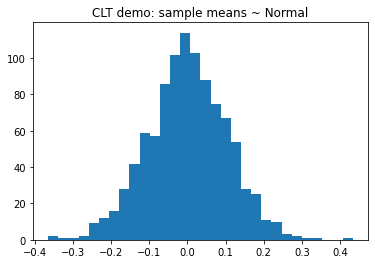

In [3]:
# Random numbers & CLT demo
samples = [np.mean(np.random.randn(100)) for _ in range(1000)]
plt.hist(samples,bins=30)
plt.title('CLT demo: sample means ~ Normal')
plt.show()

## 2. Pandas — DataFrames, indexing, groupby, joins, time series

Pandas builds on NumPy and provides **tabular data structures** like Series and DataFrames.

In [4]:
# Create DataFrame
df = pd.DataFrame({
    'id': np.arange(1,11),
    'state': np.random.choice(['NY','CA','TX'],10),
    'income': np.random.randint(40000,120000,10),
    'loan': np.random.randint(5000,40000,10)
})
display(df)

# Indexing and selection
print(df.loc[0,'state'])
print(df[df['income']>80000])

,id,state,income,loan
0,1,CA,89301,15942
1,2,TX,77276,28429
2,3,TX,45266,23132
3,4,NY,71225,11269
4,5,CA,80823,35979
5,6,CA,74991,13443
6,7,CA,74083,30597
7,8,NY,71858,7687
8,9,TX,75203,10215
9,10,CA,88782,29915


CA
   id state  income   loan
0   1    CA   89301  15942
4   5    CA   80823  35979
9  10    CA   88782  29915


state
CA    25175.2
NY     9478.0
TX    20592.0
Name: loan, dtype: float64


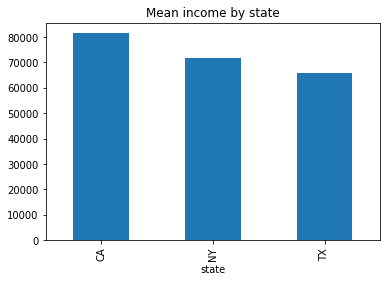

In [5]:
# Groupby
print(df.groupby('state')['loan'].mean())

# Plot group means
df.groupby('state')['income'].mean().plot(kind='bar')
plt.title('Mean income by state')
plt.show()

In [6]:
# Joins / merges
region = pd.DataFrame({'state':['NY','CA','TX'],'region':['East','West','South']})
df2 = df.merge(region,on='state',how='left')
display(df2)

# Pivot table
print(df2.pivot_table(values='loan',index='region',aggfunc='mean'))

,id,state,income,loan,region
0,1,CA,89301,15942,West
1,2,TX,77276,28429,South
2,3,TX,45266,23132,South
3,4,NY,71225,11269,East
4,5,CA,80823,35979,West
5,6,CA,74991,13443,West
6,7,CA,74083,30597,West
7,8,NY,71858,7687,East
8,9,TX,75203,10215,South
9,10,CA,88782,29915,West


           loan
region         
East     9478.0
South   20592.0
West    25175.2


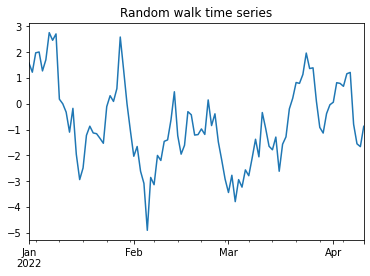

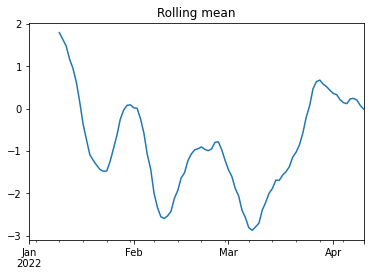

In [7]:
# Time series basics
dates = pd.date_range('2022-01-01',periods=100,freq='D')
ts = pd.Series(np.random.randn(100).cumsum(),index=dates)
ts.plot()
plt.title('Random walk time series')
plt.show()

# Rolling mean
ts.rolling(10).mean().plot()
plt.title('Rolling mean')
plt.show()

## 3. SciPy — Distributions, statistics, optimization, ODEs

SciPy builds on NumPy and provides **scientific routines**.

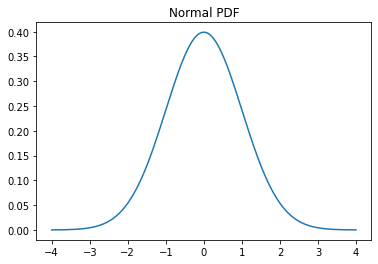

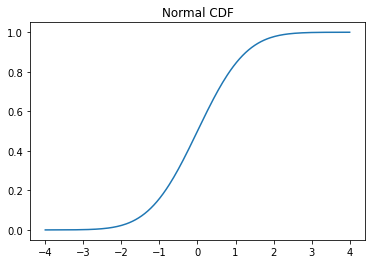

In [8]:
# Distributions: Normal PDF/CDF
x = np.linspace(-4,4,200)
plt.plot(x,stats.norm.pdf(x))
plt.title('Normal PDF')
plt.show()
plt.plot(x,stats.norm.cdf(x))
plt.title('Normal CDF')
plt.show()

In [9]:
# Statistical tests
a = np.random.normal(0,1,100)
b = np.random.normal(0.5,1,100)
print(stats.ttest_ind(a,b))

TtestResult(statistic=-3.7495670521751805, pvalue=0.0002324792699975545, df=198.0)


In [10]:
# Optimization: minimize quadratic
f = lambda v: (v[0]-1)**2+(v[1]+2)**2
res = optimize.minimize(f,[0,0])
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1411716670850257e-15
        x: [ 1.000e+00 -2.000e+00]
      nit: 2
      jac: [-2.317e-08 -4.091e-08]
 hess_inv: [[ 9.000e-01  2.000e-01]
            [ 2.000e-01  6.000e-01]]
     nfev: 9
     njev: 3


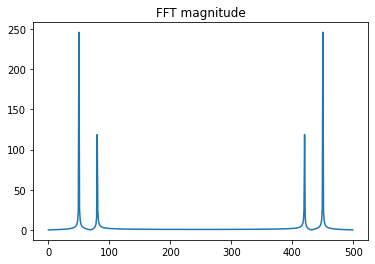

In [11]:
# FFT demo
t = np.linspace(0,1,500)
sig = np.sin(50*2*np.pi*t)+0.5*np.sin(80*2*np.pi*t)
fft = np.fft.fft(sig)
plt.plot(np.abs(fft))
plt.title('FFT magnitude')
plt.show()

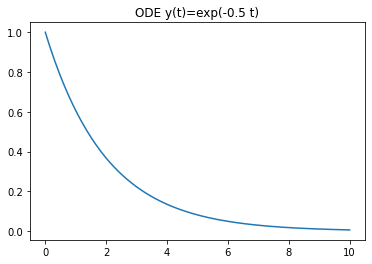

In [12]:
# ODE solve
def rhs(t,y): return -0.5*y
sol=integrate.solve_ivp(rhs,(0,10),[1],t_eval=np.linspace(0,10,200))
plt.plot(sol.t,sol.y[0])
plt.title('ODE y(t)=exp(-0.5 t)')
plt.show()

## 4. Matplotlib — Visualization Techniques

Matplotlib is the base plotting library for Python. Most other viz libraries build on it.

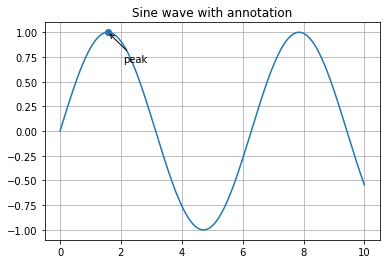

In [13]:
# Line plot with annotation
t = np.linspace(0,10,300)
s = np.sin(t)
plt.plot(t,s)
imax=np.argmax(s)
plt.scatter([t[imax]],[s[imax]])
plt.annotate('peak',xy=(t[imax],s[imax]),xytext=(t[imax]+0.5,s[imax]-0.3),
                 arrowprops=dict(arrowstyle='->'))
plt.title('Sine wave with annotation')
plt.grid(True)
plt.show()

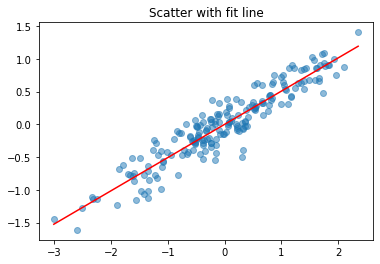

In [14]:
# Scatter plot with regression line
x=np.random.randn(200)
y=0.5*x+0.2*np.random.randn(200)
plt.scatter(x,y,alpha=0.5)
b1=(x@y)/(x@x)
xx=np.linspace(x.min(),x.max(),50)
plt.plot(xx,b1*xx,color='red')
plt.title('Scatter with fit line')
plt.show()

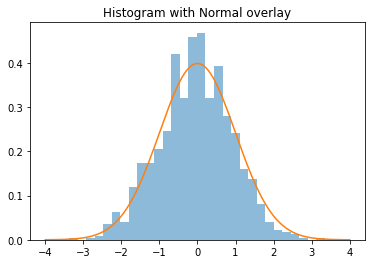

In [15]:
# Histogram & KDE overlay
data=np.random.randn(1000)
plt.hist(data,bins=30,density=True,alpha=0.5)
xs=np.linspace(-4,4,200)
plt.plot(xs,stats.norm.pdf(xs))
plt.title('Histogram with Normal overlay')
plt.show()

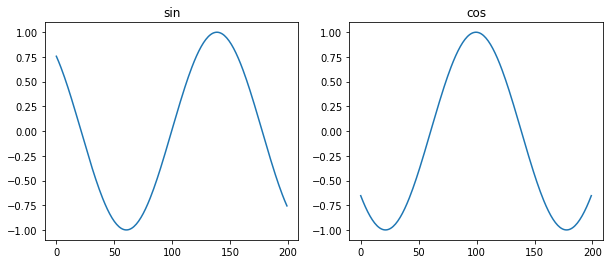

In [16]:
# Subplots
fig,axs=plt.subplots(1,2,figsize=(10,4))
axs[0].plot(np.sin(xs));axs[0].set_title('sin')
axs[1].plot(np.cos(xs));axs[1].set_title('cos')
plt.show()

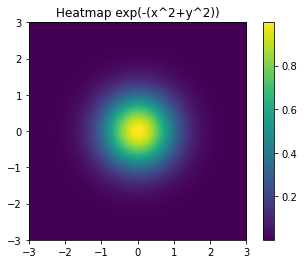

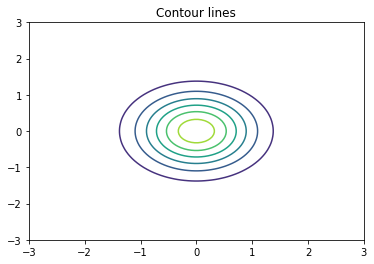

In [17]:
# Heatmap & contour
X,Y=np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
Z=np.exp(-(X**2+Y**2))
plt.imshow(Z,extent=(-3,3,-3,3))
plt.colorbar();plt.title('Heatmap exp(-(x^2+y^2))')
plt.show()
plt.contour(X,Y,Z)
plt.title('Contour lines')
plt.show()

## 5. SymPy — Symbolic Algebra & Calculus

SymPy provides symbolic computation: exact simplification, calculus, solving equations.

In [18]:
sp.init_printing()
x,a=sp.symbols('x a')
expr=(x**2-1)/(x-1)
display(sp.simplify(expr))

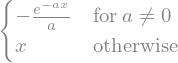

In [19]:
# Derivatives and integrals
display(sp.diff(sp.sin(x),x))
display(sp.integrate(sp.exp(-a*x),x))

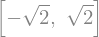

In [20]:
# Solving equations
eq=sp.Eq(x**2-2,0)
display(sp.solve(eq))

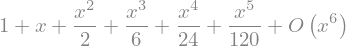

In [21]:
# Series expansion
display(sp.series(sp.exp(x),x,0,6))

In [22]:
# ODE solution
t=sp.symbols('t')
y=sp.Function('y')
ode=sp.Eq(sp.diff(y(t),t)+a*y(t),0)
display(sp.dsolve(ode))

## 6. scikit-learn — Pipelines, Regression, Classification, PCA, Clustering

scikit-learn is the main library for classical machine learning in Python.
It builds on NumPy, SciPy, and matplotlib.

coef: [1.93737083] intercept: 3.387872630416261


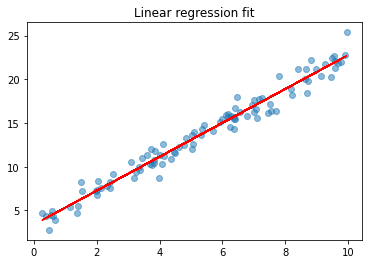

In [23]:
# Example 1: Linear regression
from sklearn.linear_model import LinearRegression
X = np.random.rand(100,1)*10
y = 3+2*X[:,0]+np.random.randn(100)
model=LinearRegression().fit(X,y)
print('coef:',model.coef_,'intercept:',model.intercept_)
plt.scatter(X,y,alpha=0.5)
plt.plot(X,model.predict(X),color='red')
plt.title('Linear regression fit')
plt.show()

AUC: 0.9757322547668786


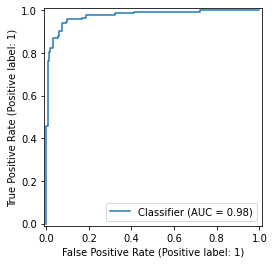

In [24]:
# Example 2: Logistic regression classification
X,y=make_classification(n_samples=1000,n_features=5,n_informative=3,random_state=42)
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.3,random_state=42)
pipe=Pipeline([('sc',StandardScaler()),('lr',LogisticRegression(max_iter=400))])
pipe.fit(Xtr,ytr)
ypr=pipe.predict_proba(Xte)[:,1]
print('AUC:',roc_auc_score(yte,ypr))
RocCurveDisplay.from_predictions(yte,ypr)
plt.show()

In [25]:
# Example 3: Cross-validation with multiple metrics
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_validate(pipe,X,y,cv=cv,scoring=['accuracy','precision','recall','f1','roc_auc'])
for k,v in scores.items():
    if k.startswith('test_'):
        print(k,np.mean(v))

test_accuracy 0.9059999999999999
test_precision 0.9127926831871251
test_recall 0.8969696969696969
test_f1 0.9045697983311796
test_roc_auc 0.9664766476647666


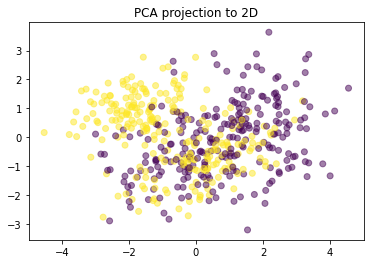

Explained variance ratio: [0.29174951 0.14707504]


In [26]:
# Example 4: PCA dimensionality reduction
X,y=make_classification(n_samples=500,n_features=10,n_informative=5,random_state=42)
X_scaled=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
Z=pca.fit_transform(X_scaled)
plt.scatter(Z[:,0],Z[:,1],c=y,alpha=0.5)
plt.title('PCA projection to 2D')
plt.show()
print('Explained variance ratio:',pca.explained_variance_ratio_)

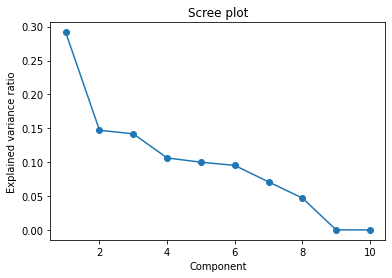

In [27]:
# Example 5: Scree plot
pca_full=PCA().fit(X_scaled)
evr=pca_full.explained_variance_ratio_
plt.plot(np.arange(1,len(evr)+1),evr,marker='o')
plt.title('Scree plot')
plt.xlabel('Component')
plt.ylabel('Explained variance ratio')
plt.show()

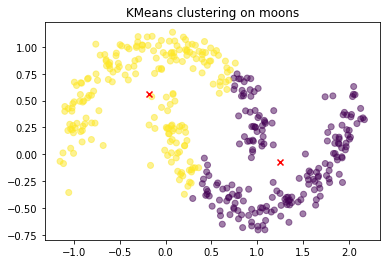

In [28]:
# Example 6: Clustering with KMeans
X,y=make_moons(400,noise=0.1,random_state=42)
km=KMeans(n_clusters=2,n_init=10,random_state=42)
labels=km.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,alpha=0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='x')
plt.title('KMeans clustering on moons')
plt.show()

In [29]:
# Example 7: Random Forest classification
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(Xtr,ytr)
ypr=rf.predict_proba(Xte)[:,1]
print('RF AUC:',roc_auc_score(yte,ypr))

RF AUC: 0.9859104849104404


In [30]:
# Example 8: Pipeline with preprocessing and model
pipe=Pipeline([('sc',StandardScaler()),('rf',RandomForestClassifier(n_estimators=100,random_state=42))])
pipe.fit(Xtr,ytr)
print('Pipeline RF test accuracy:',pipe.score(Xte,yte))

Pipeline RF test accuracy: 0.97


## 7. PyTorch — Tensors, Autograd, MLP on MNIST

PyTorch provides tensor operations like NumPy, but with automatic differentiation and GPU support.

In [31]:
if TORCH_OK:
    import torchvision
    import torchvision.transforms as transforms
    
    # Example 1: Tensor basics
    t = torch.tensor([[1.,2.],[3.,4.]],requires_grad=True)
    print('Tensor:',t)
    print('Shape:',t.shape)

    # Example 2: Autograd
    y = (t**2).sum()
    y.backward()
    print('Gradient:',t.grad)

    # Example 3: Load MNIST subset
    transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
    trainset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
    testset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)
    trainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
    testloader=torch.utils.data.DataLoader(testset,batch_size=256,shuffle=False)
    
    # Example 4: Define MLP
    class MLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.net=nn.Sequential(
                nn.Flatten(),
                nn.Linear(28*28,128),nn.ReLU(),
                nn.Linear(128,64),nn.ReLU(),
                nn.Linear(64,10))
        def forward(self,x): return self.net(x)
    
    model=MLP()
    opt=optim.Adam(model.parameters(),lr=1e-3)
    loss_fn=nn.CrossEntropyLoss()
    
    # Example 5: Training loop (1 epoch for speed)
    for epoch in range(1):
        for X,y in trainloader:
            opt.zero_grad(); out=model(X); loss=loss_fn(out,y)
            loss.backward(); opt.step()
    
    # Evaluate
    correct,total=0,0
    with torch.no_grad():
        for X,y in testloader:
            pred=model(X).argmax(1)
            correct+=(pred==y).sum().item()
            total+=y.size(0)
    print('PyTorch MNIST test acc:',correct/total)
else:
    print('PyTorch not available')

Tensor: tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
Shape: torch.Size([2, 2])
Gradient: tensor([[2., 4.],
        [6., 8.]])
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 5509847.48it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 140144.31it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1335179.12it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2649218.30it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

PyTorch MNIST test acc: 0.9242


## 8. TensorFlow/Keras — Sequential API on MNIST

TensorFlow is another deep learning framework. Keras gives a high-level API for model definition.

In [32]:
if TF_OK:
    from tensorflow.keras.datasets import mnist
    (Xtr,ytr),(Xte,yte)=mnist.load_data()
    Xtr=(Xtr/255.0).reshape(-1,28*28)
    Xte=(Xte/255.0).reshape(-1,28*28)
    
    # Example 1: Tensor basics
    t=tf.constant([[1.,2.],[3.,4.]])
    print('Tensor:',t)

    # Example 2: Build Sequential model
    model=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')])
    
    # Example 3: Compile
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    # Example 4: Train (1 epoch for speed)
    history=model.fit(Xtr,ytr,epochs=1,batch_size=128,validation_split=0.1)
    
    # Example 5: Evaluate
    loss,acc=model.evaluate(Xte,yte,verbose=0)
    print('TF MNIST test acc:',acc)
else:
    print('TensorFlow not available')

2025-09-05 21:21:17.081160: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


2025-09-05 21:21:17.608626: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8239 - loss: 0.6380

2025-09-05 21:21:21.710123: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8247 - loss: 0.6352 - val_accuracy: 0.9618 - val_loss: 0.1380


2025-09-05 21:21:22.105115: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


TF MNIST test acc: 0.9538000226020813
